In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import numpy as np
import plotly.express as px

### Load Datasets

In [ ]:
merged_data = pd.read_csv("data/processed/merged_firm_returns.csv")

In [ ]:
ratios_data = pd.read_csv("data/processed/with_outliers_dataset.csv")

In [ ]:
firm_data = pd.read_csv("data/raw/Firm_Data.csv")

In [ ]:
without_outliers_data = pd.read_csv(
    "data/processed/without_outliers_dataset.csv"
)

### Correlation map for Pillar scores

In [ ]:
scores_columns = [
    "ESG Score",
    "Social Pillar Score",
    "Governance Pillar Score",
    "Environmental Pillar Score",
]

In [ ]:
cormat = firm_data[scores_columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

### Highly correlated features

In [ ]:
financial_columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment, Total - Gross",
    "ESG Score",
]

In [ ]:
cormat = merged_data[financial_columns].corr()
sns.heatmap(cormat, annot=True)
plt.figure(figsize=(20, 20))
plt.show()

### All features correlation

In [ ]:
merged_data.rename(
    columns={
        "Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions to Revenue",
        "Property Plant And Equipment, Total - Gross": "Property Plant And Equipment",
    },
    inplace=True,
)
merged_data.rename(columns={"returns_yearly": "Yearly Returns"}, inplace=True)

In [ ]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment",
    "CO2 Emissions to Revenue",
    "Company Market Capitalization",
    "Revenue Per Share",
    "P/E (Daily Time Series Ratio)",
    "Yearly Returns",
    "ESG Score",
]

In [ ]:
cormat = merged_data[columns].corr()
sns.heatmap(cormat, annot=False)
plt.figure(figsize=(20, 20))
plt.show()

### With ratios

In [ ]:
ratios_data.rename(
    columns={
        "Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions to Revenue",
        "Property Plant And Equipment, Total - Gross": "Property Plant And Equipment",
        "returns_yearly": "Yearly Returns",
    },
    inplace=True,
)

In [ ]:
ratios_data.drop(columns=["Year"], inplace=True)

In [ ]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment",
    "Revenue Per Share",
    "CO2 Emissions to Revenue",
    "Company Market Capitalization",
    "P/E (Daily Time Series Ratio)",
    "Yearly Returns",
    "Current Ratio",
    "Debt-to-Equity Ratio",
    "Return on Assets",
    "Revenue Per Employee",
    "Return on Equity",
    "Asset Turnover Ratio",
    "Net Income Margin",
    "ESG Score",
]

In [ ]:
cormat = ratios_data[columns].corr()
sns.heatmap(cormat, annot=False)
plt.figure(figsize=(20, 20))
plt.show()

### Missing Data Analysis

In [ ]:
merged_data.isna().sum()

In [ ]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment",
    "CO2 Emissions to Revenue",
    "Company Market Capitalization",
    "Revenue Per Share",
    "P/E (Daily Time Series Ratio)",
    "Yearly Returns",
    "ESG Score",
]

In [ ]:
# calculate the percentage of missing values in each column
missing_percentage = (
    merged_data[columns].isnull().sum() / len(merged_data)
) * 100

# create a horizontal bar plot of the missing percentage values
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(missing_percentage.index, missing_percentage)
ax.set_xlabel("Percentage of Missing Values")
ax.set_ylabel("Columns")
ax.set_title("Missing Values by Column")
# set the x-axis scale manually
ax.set_xlim([0, 50])
for i, v in enumerate(missing_percentage):
    ax.text(v + 1, i, str(round(v, 2)) + "%", color="red")
plt.show()

### Data Distributions

In [ ]:
without_outliers_data.rename(
    columns={
        "Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions to Revenue",
        "Property Plant And Equipment, Total - Gross": "Property Plant And Equipment",
    },
    inplace=True,
)
without_outliers_data.rename(
    columns={"returns_yearly": "Yearly Returns"}, inplace=True
)

In [ ]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment",
    "Company Market Capitalization",
    "Revenue Per Share",
    "P/E (Daily Time Series Ratio)",
    "Yearly Returns",
    "ESG Score",
]

In [ ]:
# Plot a histogram

merged_data[columns].hist(figsize=(20, 20))

In [ ]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Total Revenue",
    "Total Equity",
    "Property Plant And Equipment",
    "Company Market Capitalization",
    "Revenue Per Share",
    "P/E (Daily Time Series Ratio)",
    "Yearly Returns",
]

In [ ]:
# Plot a histogram
without_outliers_data[columns].hist(figsize=(20, 20))

In [48]:
ratios_columns = ['Current Ratio',
       'Debt-to-Equity Ratio', 'Return on Assets', 'Revenue Per Employee',
       'Return on Equity', 'Asset Turnover Ratio', 'Net Income Margin']

array([[<Axes: title={'center': 'Current Ratio'}>,
        <Axes: title={'center': 'Debt-to-Equity Ratio'}>,
        <Axes: title={'center': 'Return on Assets'}>],
       [<Axes: title={'center': 'Revenue Per Employee'}>,
        <Axes: title={'center': 'Return on Equity'}>,
        <Axes: title={'center': 'Asset Turnover Ratio'}>],
       [<Axes: title={'center': 'Net Income Margin'}>, <Axes: >,
        <Axes: >]], dtype=object)

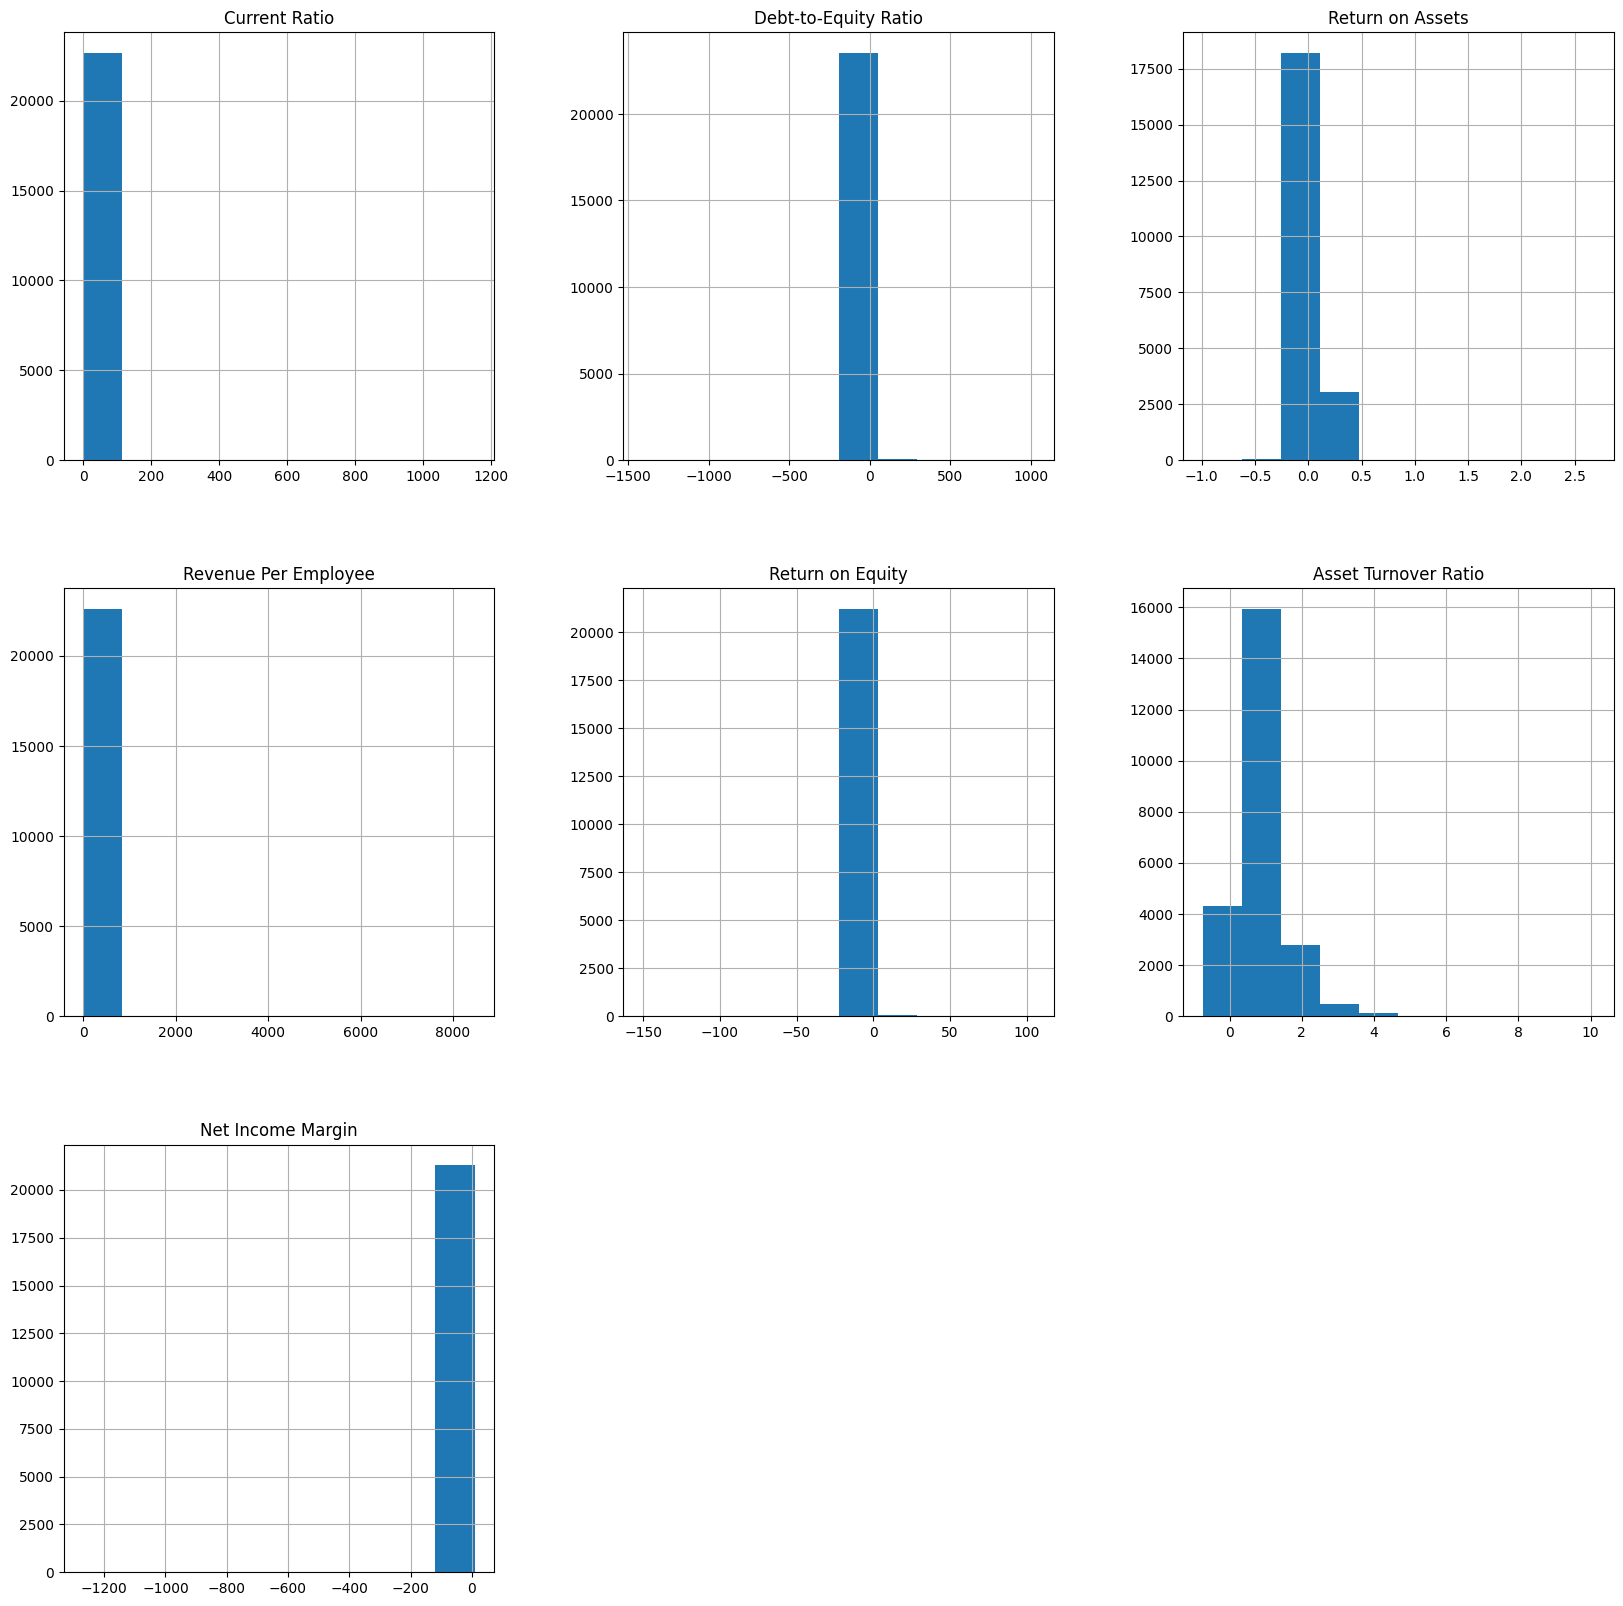

In [52]:
ratios_data[ratios_data.replace([np.inf, -np.inf], np.nan).notnull()][ratios_columns].hist(figsize=(20, 20))

array([[<Axes: title={'center': 'Current Ratio'}>,
        <Axes: title={'center': 'Debt-to-Equity Ratio'}>,
        <Axes: title={'center': 'Return on Assets'}>],
       [<Axes: title={'center': 'Revenue Per Employee'}>,
        <Axes: title={'center': 'Return on Equity'}>,
        <Axes: title={'center': 'Asset Turnover Ratio'}>],
       [<Axes: title={'center': 'Net Income Margin'}>, <Axes: >,
        <Axes: >]], dtype=object)

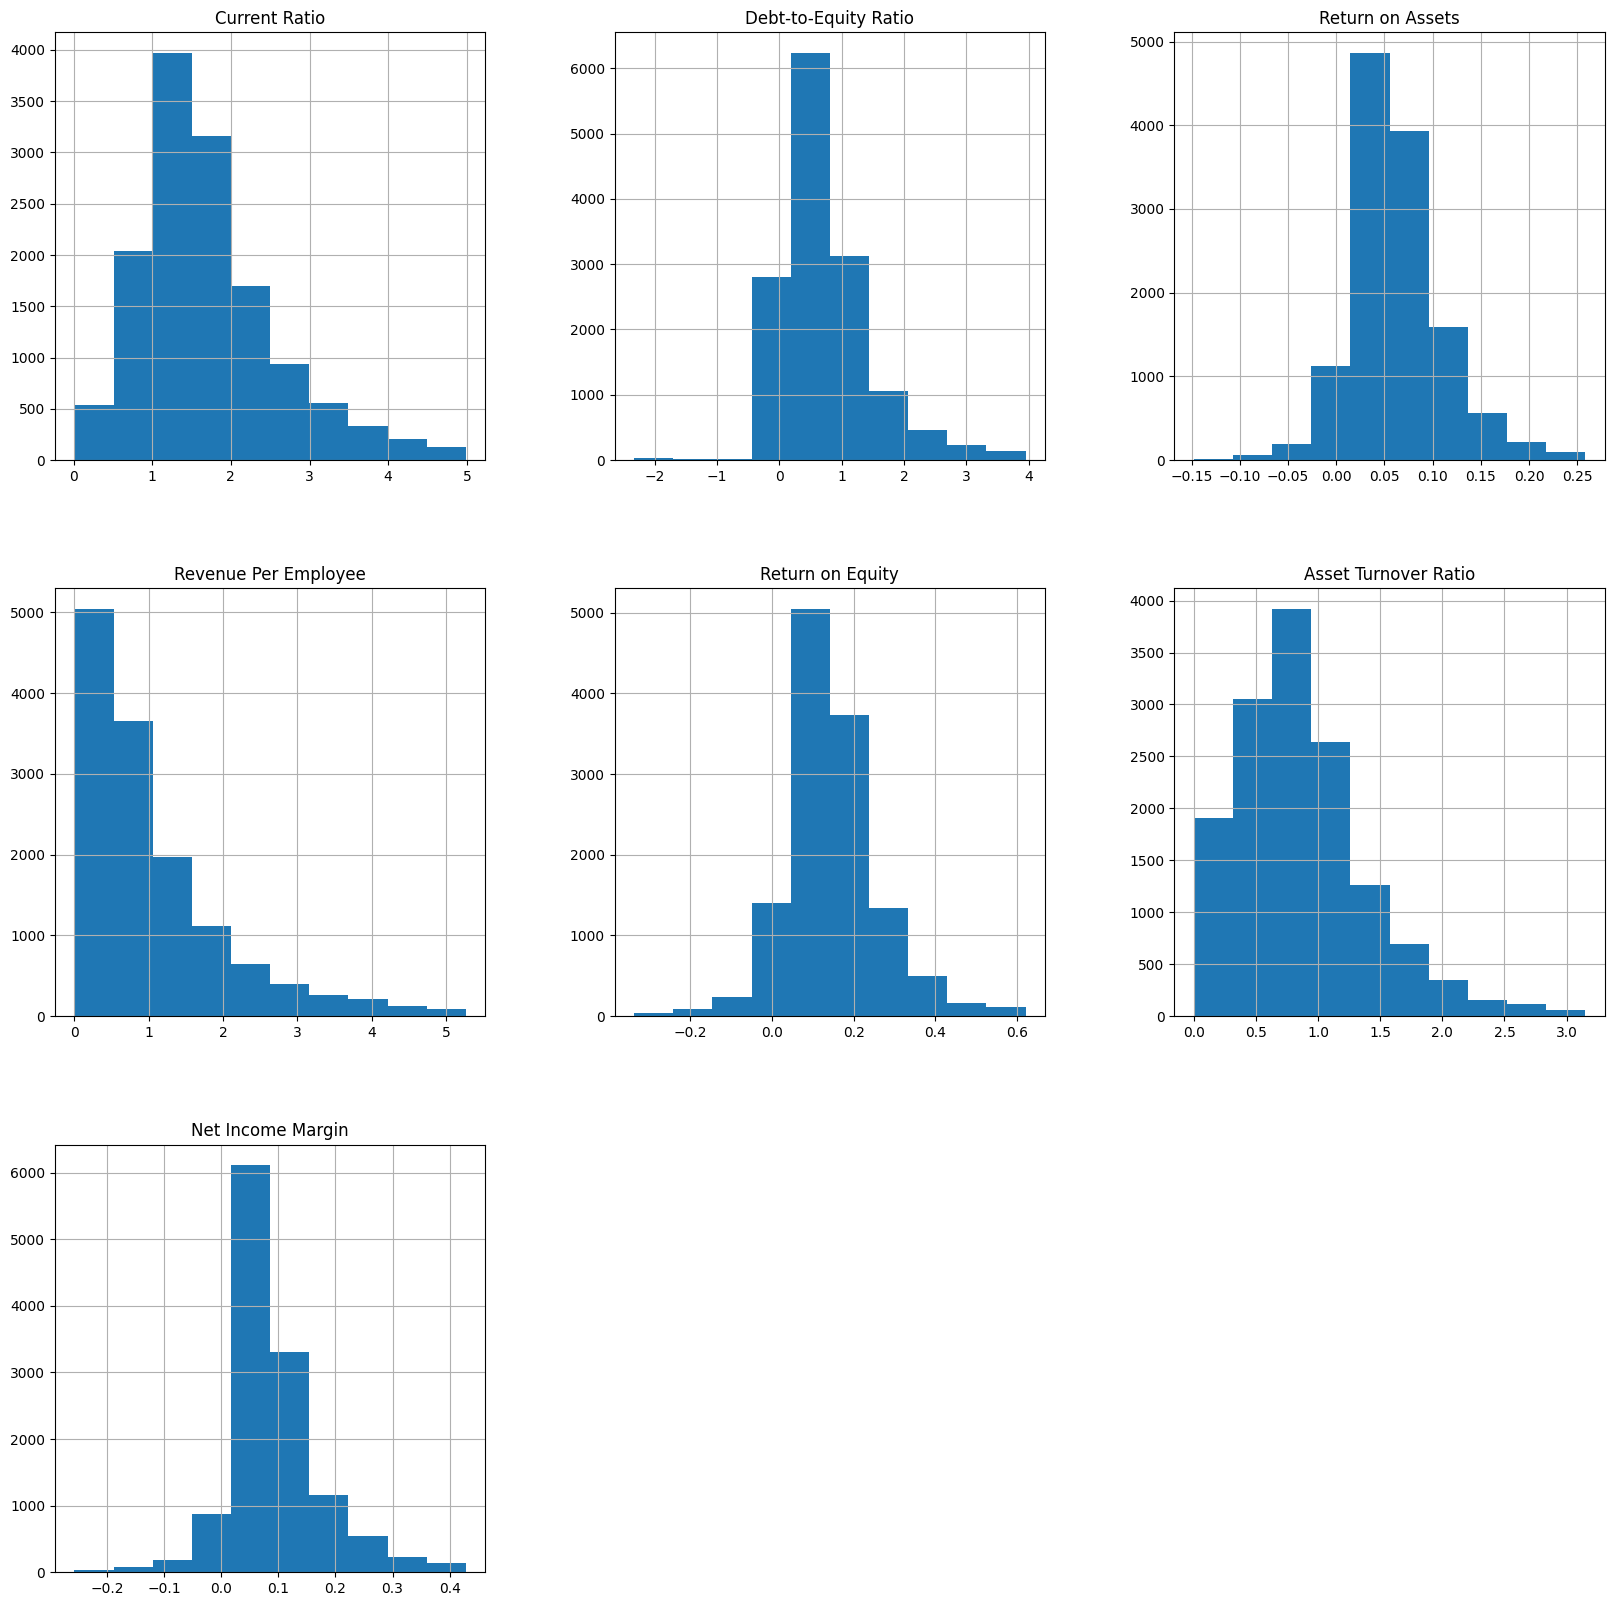

In [49]:
# Plot a histogram
without_outliers_data[ratios_columns].hist(figsize=(20, 20))

In [ ]:
# Load your dataframe
df = merged_data[columns]

# Calculate the 90th percentile for each column
quantile = df.quantile(0.9)

# Define the figure size and subplot layout
fig, axes = plt.subplots(
    nrows=int(np.ceil(len(df.columns) / 3)), ncols=3, figsize=(15, 15)
)

# Plot histograms for each column
for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(df[column][df[column] <= quantile[column]], bins=20)
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Hide unused subplots
for i in range(len(df.columns), int(np.ceil(len(df.columns) / 3)) * 3):
    row = i // 3
    col = i % 3
    axes[row, col].axis("off")

# Add a super title for the figure
fig.suptitle(
    "Histogram of All Columns with Limit at 90th Percentile", fontsize=16
)

# Adjust the spacing between subplots
fig.tight_layout(pad=2.0)

plt.show()